Text(0.5, 0.92, 'Площина обмежень')

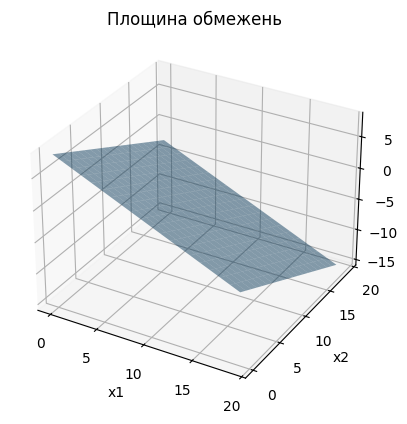

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

B = 100 # золотих

x1 = np.arange(0, 20)
x2 = np.arange(0, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = (B - 8*x1 - 7*x2)/12

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Площина обмежень")

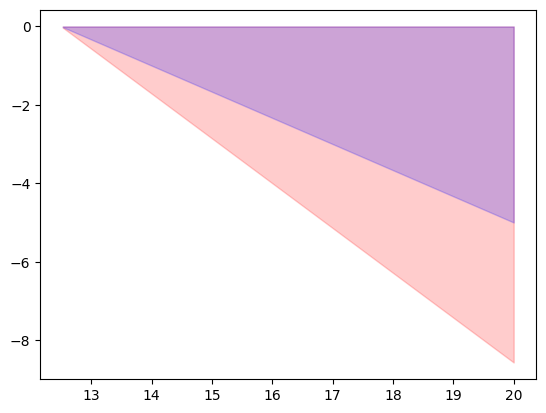

In [2]:
x1 = np.linspace(0, 20, 100)
x21 = (B-8*x1)/7 # За умови що х3=0
x31 = (B-8*x1)/12 # За умови що х2=0

plt.fill_between(x1, x21, 0, where=x21<0, alpha=0.2, color='red')
plt.fill_between(x1, x31, 0, where=x31<0, alpha=0.2, color='blue')

In [3]:
# обертаємо задачу на знаходження мінімуму
c = np.array([10, 7, 5])

# Записуємо матрицю умов (з коефіцієнтів рівнянь)
A = np.array([
    [8, 7, 12]
])

# Записуємо матрицю розвязків
b = np.array([B])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

x1, x2, x3 = res.x
profit = -res.fun

# Результати
print(f"Кількість предмету 1: {x1}")
print(f"Кількість предмету 2: {x2}")
print(f"Кількість предмету 3: {x3}")
print(f"Загальний прибуток: {profit} золотих")

Кількість предмету 1: 12.5
Кількість предмету 2: 0.0
Кількість предмету 3: 0.0
Загальний прибуток: 125.0 золотих
